<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

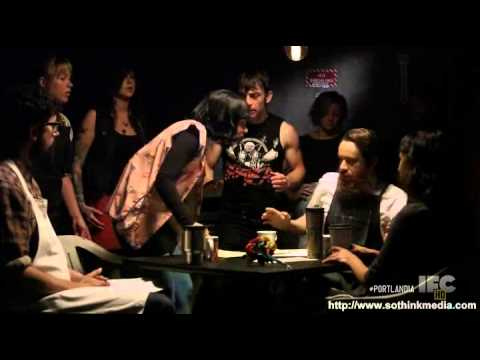

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [4]:
%pwd

'C:\\Users\\celes\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [6]:
# Start here 
shops['star_rating'] = shops['star_rating'].str.replace('star rating', '')

In [7]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [8]:
import re

In [9]:
shops['full_review_text'].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},
    regex=True,
    inplace=True,
    )

In [10]:
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0
...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chan...,4.0
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do the...",5.0
7613,The Steeping Room,"Loved coming here for tea, and the atmospher...",4.0
7614,The Steeping Room,The food is just average. The booths didn't ...,3.0


In [11]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [12]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [13]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,"[1, checkin, they, are, located, within, the, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
from collections import Counter

In [15]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [16]:
wc = count(shops['tokens'])

In [17]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,the,6847,34809,1.0,0.045012,0.045012,0.899028
37,and,6863,26629,2.0,0.034434,0.079446,0.901129
15,a,6246,22754,3.0,0.029423,0.108870,0.820116
42,i,5528,20237,4.0,0.026169,0.135038,0.725840
5,to,5653,17164,5.0,0.022195,0.157233,0.742253


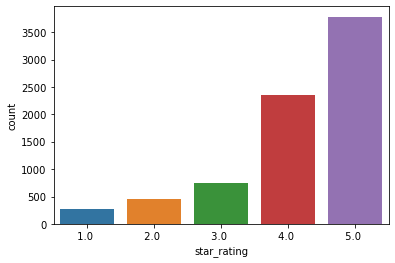

In [18]:
import seaborn as sns

sns.countplot(shops['star_rating']);

In [21]:
def label(row):
    if row['star_rating'] <= 3:
        return "bad"
    else:
        return "good"

In [22]:
shops['star_rating'] = shops['star_rating'].astype(float)

In [24]:
shops['rating'] = shops.apply(label, axis=1)

In [25]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,"[1, checkin, love, love, loved, the, atmospher...",good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0,"[listed, in, date, night, austin, ambiance, in...",good
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0,"[1, checkin, listed, in, brunch, spots, i, lov...",good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0,"[very, cool, decor, good, drinks, nice, seatin...",bad
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0,"[1, checkin, they, are, located, within, the, ...",good


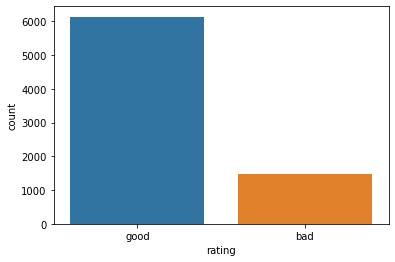

In [26]:
sns.countplot(shops['rating']);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

